# BTC Charts

**Date:** Thursday, December 12, 2024


## Step One: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import sqlalchemy as sa
from sqlalchemy import create_engine, text

## Step Two: Initialize

### Plots and Pandas

In [2]:
plt.style.use("fivethirtyeight")  # ggplot, fivethirtyeight, seaborn
pd.set_option('display.max_columns', 200)

### Database

In [3]:
db_url = "postgresql+psycopg://localhost/patrick"
db_schema = "btc_rates"

engine = create_engine(db_url, echo=False)

@sa.event.listens_for(engine, "connect", insert=True)
def set_search_path(dbapi_connection, connection_record):
    """
    Set schema search path in database
    """
    sql = f"SET SESSION search_path TO {db_schema},public;"
    existing_autocommit = dbapi_connection.autocommit
    dbapi_connection.autocommit = True
    cursor = dbapi_connection.cursor()
    cursor.execute(sql)
    cursor.close()
    dbapi_connection.autocommit = existing_autocommit

## Step Three: Load Data

In [4]:
symbol = "BTC-CAD"
tbl = "dt_yahoo_daily"
columns = "id date_id price".split()
cols = ",".join(columns)
sql = f"SELECT {cols} FROM {tbl} WHERE symbol = '{symbol}';"

# df = pd.read_sql(sql, con=engine, index_col="id")
df = pd.read_sql(tbl, con=engine, index_col="id")

## Step Four: Understand Data

- `shape`, `colums`, `head`, `tail`, `dtypes`, `describe`

In [5]:
df.shape

(18882, 3)

In [6]:
df.columns

Index(['date_id', 'symbol', 'price'], dtype='object')

In [7]:
df.head(6)

,date_id,symbol,price
id,,,
1000001,2010-06-29,TSLA,1.592667
1000002,2010-06-30,TSLA,1.588667
1000003,2010-07-01,TSLA,1.464000
1000004,2010-07-02,TSLA,1.280000
1000005,2010-07-06,TSLA,1.074000
1000006,2010-07-07,TSLA,1.053333


In [8]:
df.tail(6)

,date_id,symbol,price
id,,,
1018877,2024-12-11,BTC-CAD,137038.875000
1018878,2024-12-11,BTC-USD,101173.031250
1018879,2024-12-11,BCH-CAD,732.394653
1018880,2024-12-11,BCH-USD,547.311218
1018881,2024-12-11,BCH-BTC,0.005346
1018882,2024-12-11,TSLA,424.769989


In [9]:
df.dtypes

date_id    datetime64[ns]
symbol             object
price             float64
dtype: object

In [10]:
df.describe()

,date_id,price
count,18882,18882.000000
mean,2020-01-25 22:05:22.592945408,8941.020636
min,2010-06-29 00:00:00,0.003882
25%,2018-02-17 00:00:00,21.751500
50%,2020-05-27 00:00:00,358.025894
75%,2022-09-03 18:00:00,6890.485718
max,2024-12-11 00:00:00,143231.343750
std,NaN,19250.902974


In [11]:
df.query('symbol == "BTC-CAD"').describe()

,date_id,price
count,3739,3739.000000
mean,2019-10-30 00:00:00,25233.078827
min,2014-09-17 00:00:00,212.690598
25%,2017-04-08 12:00:00,1629.515686
50%,2019-10-30 00:00:00,12500.922852
75%,2022-05-21 12:00:00,40017.398438
max,2024-12-11 00:00:00,143231.343750
std,NaN,28494.955805


In [12]:
df.query('symbol == "BTC-USD"').describe()

,date_id,price
count,3739,3739.000000
mean,2019-10-30 00:00:00,19165.255471
min,2014-09-17 00:00:00,178.102997
25%,2017-04-08 12:00:00,1210.980041
50%,2019-10-30 00:00:00,9324.717773
75%,2022-05-21 12:00:00,30328.895508
max,2024-12-11 00:00:00,101236.015625
std,NaN,21420.978498


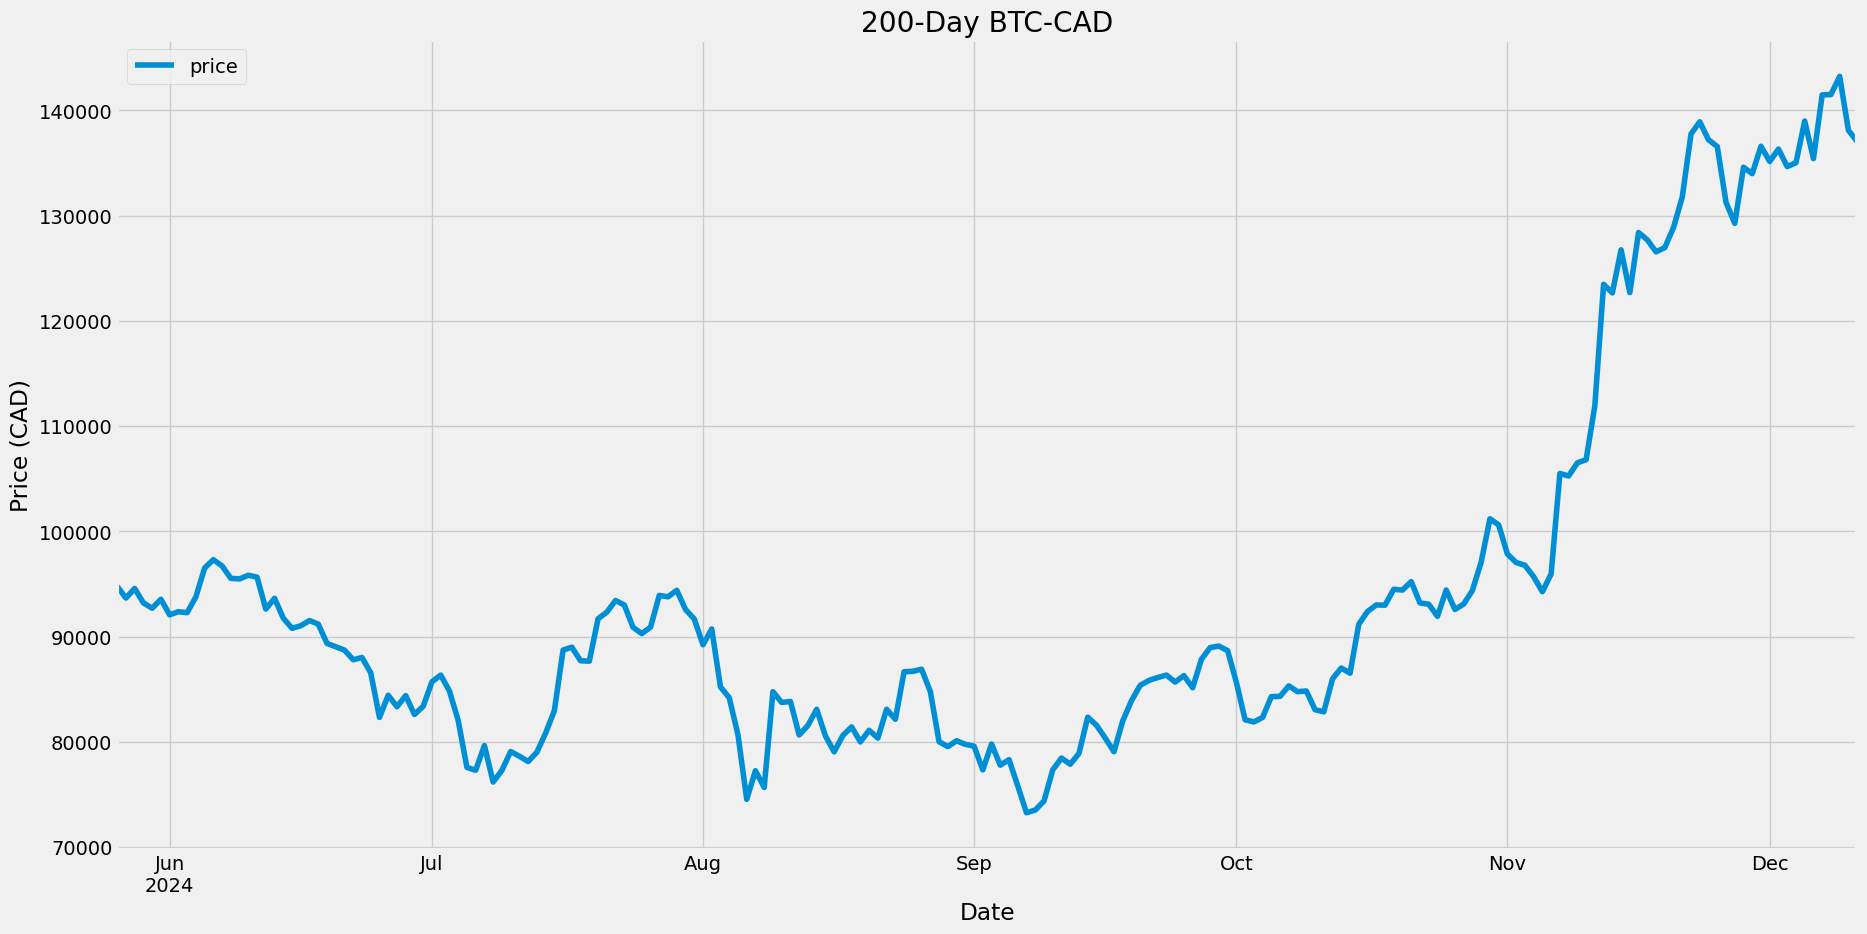

In [43]:
symbol = "BTC-CAD"
number_of_days = 200
title = f"{number_of_days}-Day BTC-CAD"
df1 = df.set_index("date_id").query(f'symbol == "{symbol}"').tail(number_of_days).plot(
    title=title, xlabel="Date", ylabel="Price (CAD)", figsize=(20,10))
# df1.shape
plt.savefig(title.replace(" ", "_"))
plt.show()

In [28]:
plt.savefig("a")

<Figure size 640x480 with 0 Axes>